In [65]:
#Two-Qubit Gates
#Amitava Chakraborty - 13th Jan 2018
from qiskit import IBMQ
# Loading your IBM Q account(s)
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2020-06-15 11:34:01,159: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [66]:
# Useful additional packages
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from math import pi
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.visualization import circuit_drawer
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit.quantum_info import state_fidelity
from qiskit import BasicAer
from qiskit.circuit.library import HGate, RZGate, CXGate, CCXGate, XGate, SwapGate
from qiskit.circuit import ControlledGate

u_backend = BasicAer.get_backend('unitary_simulator')
s_backend = BasicAer.get_backend('statevector_simulator')
q_backend = BasicAer.get_backend('qasm_simulator')

The space of quantum computer grows exponential with the number of qubits. 
For n qubits the complex vector space has dimensions 2^n.

To describe states of a multi-qubit system, we use TENSOR PRODUCT to form the operators, states or basis vectors.


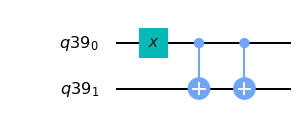

In [134]:
#Controlled gates - Controlled operations on qubits
#A common multi-qubit gate involves the application of a gate to one qubit, 
#conditioned on the state of another qubit. 
#For instance, we might want to flip the state of the second qubit when the first qubit is in 1

#The standard multi-qubit gates consist of two-qubit gates and three-qubit gates. 
#The two-qubit gates are: - 
#controlled Pauli gates - 
#controlled Hadamard gate - 
#controlled rotation gates - 
#controlled phase gate - 
#controlled u3 gate - 
#swap gate

#Two-qubit gates
#Most of the two-gates are of the controlled type (the SWAP gate being the exception). 
#In general, a controlled two-qubit gate C acts to apply the single-qubit unitary U 
#to the second qubit when the state of the first qubit is in 1
q = QuantumRegister(2)

#Controlled Pauli Gates
#Controlled-X (or, controlled-NOT) gate
#The controlled-not gate flips the target qubit when the control qubit is in the state 1
qc = QuantumCircuit(q)
#Old Way
#qc.cx(q[0],q[1])
#New Way
cx = CXGate()
x = XGate()
qc = qc.compose(x,[0]).compose(cx, [0, 1])
qc = qc.compose(cx, [0, 1])
#qc = qc.compose(x, [0])
qc.draw(output='mpl')

In [135]:
job = execute(qc, u_backend)
job.result().get_unitary(qc, decimals=3)

array([[0.+0.j, 1.-0.j, 0.+0.j, 0.+0.j],
       [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j]])

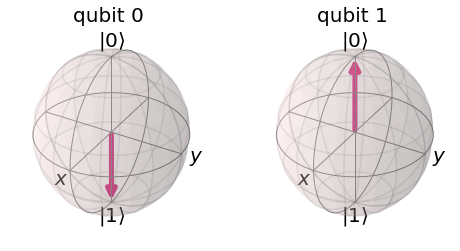

In [136]:
job = execute(qc, s_backend)
plot_bloch_multivector (job.result().get_statevector(qc))

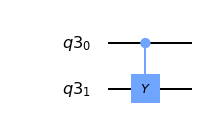

In [16]:
#Controlled Y gate
#Apply the Y gate to the target qubit if the control qubit is the MSB
qc = QuantumCircuit(q)
qc.cy(q[0],q[1])
qc.draw(output='mpl')

In [17]:
job = execute(qc, u_backend)
job.result().get_unitary(qc, decimals=3)

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.-1.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 0.+1.j, 0.+0.j, 0.+0.j]])

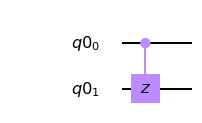

In [7]:
#Controlled Z (or, controlled Phase) gate
#Similarly, the controlled Z gate flips the phase of the target qubit 
#if the control qubit is 1
qc = QuantumCircuit(q)
qc.cz(q[0],q[1])
qc.draw(output='mpl')

In [8]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[ 1.-0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  1.-0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  1.-0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j]])

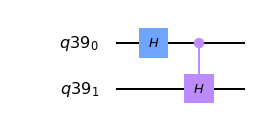

In [137]:
#Controlled Hadamard gate
#Apply H gate to the target qubit if the control qubit is 1
qc = QuantumCircuit(q)
qc.h(q[0])
qc.ch(q[0],q[1])
qc.draw(output='mpl')

In [138]:
job = execute(qc, u_backend)
job.result().get_unitary(qc, decimals=3)

array([[ 0.707-0.j,  0.707-0.j,  0.   +0.j,  0.   +0.j],
       [ 0.5  -0.j, -0.5  +0.j,  0.5  -0.j, -0.5  +0.j],
       [ 0.   +0.j,  0.   +0.j,  0.707-0.j,  0.707-0.j],
       [ 0.5  +0.j, -0.5  +0.j, -0.5  +0.j,  0.5  -0.j]])

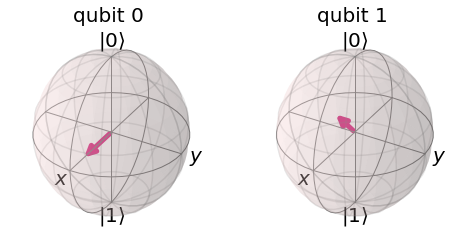

In [139]:
job = execute(qc, s_backend)
plot_bloch_multivector (job.result().get_statevector(qc))

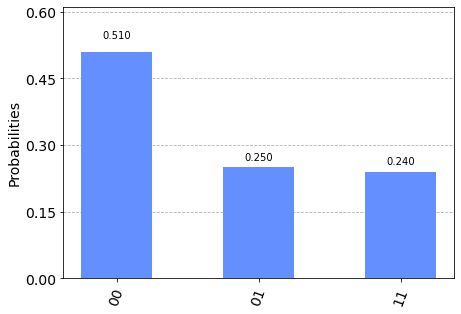

In [140]:
qc.measure_active()
job = execute(qc, q_backend, shots=100)
plot_histogram(job.result().get_counts(qc))

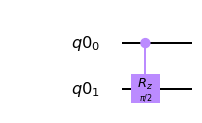

In [11]:
#Controlled rotation gates
#Controlled rotation around Z-axis
#Perform rotation around Z-axis on the target qubit if the control qubit (here LSB) is 1
qc = QuantumCircuit(q)
qc.crz(pi/2,q[0],q[1])
qc.draw(output='mpl')

In [12]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[1.   +0.j   , 0.   +0.j   , 0.   +0.j   , 0.   +0.j   ],
       [0.   +0.j   , 0.707-0.707j, 0.   +0.j   , 0.   +0.j   ],
       [0.   +0.j   , 0.   +0.j   , 1.   +0.j   , 0.   +0.j   ],
       [0.   +0.j   , 0.   +0.j   , 0.   +0.j   , 0.707+0.707j]])

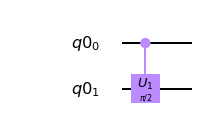

In [13]:
#Controlled phase rotation
#Perform a phase rotation if both qubits are in the |11> state. 
qc = QuantumCircuit(q)
#qc.x(q[0])
qc.cu1(pi/2,q[0], q[1])
qc.draw(output='mpl')

In [14]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+1.j]])

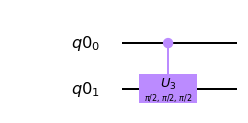

In [15]:
#Controlled    rotation
#Perform controlled u3 rotation on the target qubit if the control qubit (here LSB) is 1
qc = QuantumCircuit(q)
qc.cu3(pi/2, pi/2, pi/2, q[0], q[1])
qc.draw(output='mpl')

In [16]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[ 1.   +0.j   ,  0.   +0.j   ,  0.   +0.j   ,  0.   +0.j   ],
       [ 0.   +0.j   ,  0.707+0.j   ,  0.   +0.j   , -0.   -0.707j],
       [ 0.   +0.j   ,  0.   +0.j   ,  1.   +0.j   ,  0.   +0.j   ],
       [ 0.   +0.j   ,  0.   +0.707j,  0.   +0.j   , -0.707+0.j   ]])

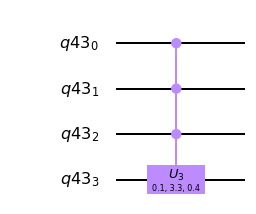

In [142]:
# Matrix representation of the controlled and controlled-controlled U3 gate
import qiskit.circuit.library.standard_gates.u3 as u3

num_ctrl = 3
# U3 gate params
theta, phi, lambda1 = 0.1, 3.3, 0.4

# cnu3 gate
u3gate = u3.U3Gate(theta, phi, lambda1)
cu3 = u3gate.control(num_ctrl)
width = cu3.num_qubits
qr = QuantumRegister(width)
qc = QuantumCircuit(qr)
qc.append(cu3, qr, [])
qc.draw('mpl')

In [143]:
job = execute([qc], BasicAer.get_backend('unitary_simulator'),
              basis_gates=['u1', 'u2', 'u3', 'id', 'cx'])
result = job.result()

# Circuit unitaries
unitary_cnu3 = result.get_unitary(0)


num_target = int(np.log2(unitary_cnu3.shape[0]))
print(num_target)
ctrl_dim = 2**num_ctrl
ctrl_grnd = np.repeat([[1], [0]], [1, ctrl_dim-1])
ctrl_state = ctrl_dim - 1

full_mat_dim = ctrl_dim * unitary_cnu3.shape[0]
full_mat = np.zeros((full_mat_dim, full_mat_dim), dtype=unitary_cnu3.dtype)
ctrl_proj = np.diag(np.roll(ctrl_grnd, ctrl_state))
full_mat = (np.kron(np.eye(2**num_target),
                       np.eye(ctrl_dim) - ctrl_proj)
            + np.kron(unitary_cnu3, ctrl_proj))
print(full_mat)

4
[[ 1.        +0.j          0.        +0.j          0.        +0.j
  ...  0.        +0.j          0.        +0.j
   0.        +0.j        ]
 [ 0.        +0.j          1.        +0.j          0.        +0.j
  ...  0.        +0.j          0.        +0.j
   0.        +0.j        ]
 [ 0.        +0.j          0.        +0.j          1.        +0.j
  ...  0.        +0.j          0.        +0.j
   0.        +0.j        ]
 ...
 [ 0.        +0.j          0.        +0.j          0.        +0.j
  ...  1.        +0.j          0.        +0.j
   0.        +0.j        ]
 [ 0.        +0.j          0.        +0.j          0.        +0.j
  ...  0.        +0.j          1.        +0.j
   0.        +0.j        ]
 [ 0.        +0.j          0.        +0.j          0.        +0.j
  ...  0.        +0.j          0.        +0.j
  -0.84704013-0.52917398j]]


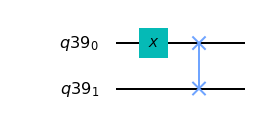

In [144]:
#SWAP gate
#The SWAP gate exchanges the two qubits. It transforms the basis vectors as
qc = QuantumCircuit(q)
qc.x(q[0])
qc.swap(q[0], q[1])
qc.draw(output='mpl')

In [145]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[0.+0.j, 1.-0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j],
       [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j]])

In [146]:
swap = SwapGate()
cswap = ControlledGate('cswap', 3, [], num_ctrl_qubits=1,
                        definition=swap.definition)
print(swap.definition==cswap.definition)
print(swap.definition)
print(cswap.definition)

True
[(<qiskit.circuit.library.standard_gates.x.CXGate object at 0x0000021D0BF27730>, [Qubit(QuantumRegister(2, 'q'), 0), Qubit(QuantumRegister(2, 'q'), 1)], []), (<qiskit.circuit.library.standard_gates.x.CXGate object at 0x0000021D0BF27BB0>, [Qubit(QuantumRegister(2, 'q'), 1), Qubit(QuantumRegister(2, 'q'), 0)], []), (<qiskit.circuit.library.standard_gates.x.CXGate object at 0x0000021D0BF27A30>, [Qubit(QuantumRegister(2, 'q'), 0), Qubit(QuantumRegister(2, 'q'), 1)], [])]
[(<qiskit.circuit.library.standard_gates.x.CXGate object at 0x0000021D0BF27730>, [Qubit(QuantumRegister(2, 'q'), 0), Qubit(QuantumRegister(2, 'q'), 1)], []), (<qiskit.circuit.library.standard_gates.x.CXGate object at 0x0000021D0BF27BB0>, [Qubit(QuantumRegister(2, 'q'), 1), Qubit(QuantumRegister(2, 'q'), 0)], []), (<qiskit.circuit.library.standard_gates.x.CXGate object at 0x0000021D0BF27A30>, [Qubit(QuantumRegister(2, 'q'), 0), Qubit(QuantumRegister(2, 'q'), 1)], [])]


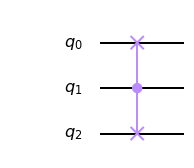

In [148]:
qc = QuantumCircuit(3)
#qc = qc.compose(swap,[0,2])
qc = qc.compose(cswap,[1,0,2])
qc.draw('mpl')

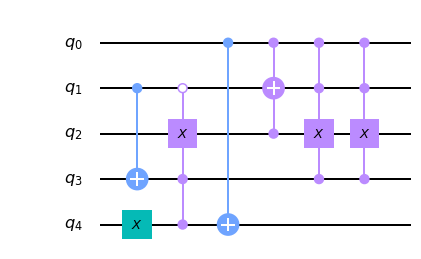

In [151]:
# Appending a controlled gate to a quantum circuit
circ = QuantumCircuit(5)
gate1 = XGate()
gate2 = CXGate()
circ.append(gate1, qargs=[4])
circ.append(gate1.control(), qargs=[1, 3])
circ.append(gate1.control().control().control(), qargs=[1, 4,3,2])
circ.append(gate2, qargs=[0, 4])
circ.append(gate2.control(), qargs=[0, 2, 1])
circ.append(gate2.control(2), qargs=[0, 3, 1, 2])
circ.append(gate2.control().control(), qargs=[0, 3, 1, 2])  # should be same as above
circ.draw('mpl')

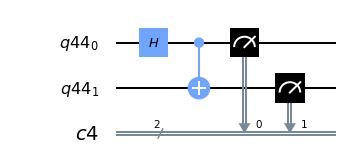

In [152]:
#The Bell State - with 2 qubits and 2 bits registers
# define a quantum circuit "circ" using a 2 qubit quantum register and a 2 bit classical register 
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
circ = QuantumCircuit(qr,cr)

# hadamard on qubit0 and control-not qubit0 to qubit1
circ.h(qr[0])
circ.cx(qr[0],qr[1]) # Control-Not gate (qubit 0 controls qubit 1),

circ.measure(qr,cr) # to perform measurement of the qubits in qr to the bits in cr
circ.draw(output='mpl')

In [153]:
# execute :
resultat = execute(circ,backend=BasicAer.get_backend('qasm_simulator'), shots=2000).result()
resultat.get_counts(circ)

{'11': 1016, '00': 984}

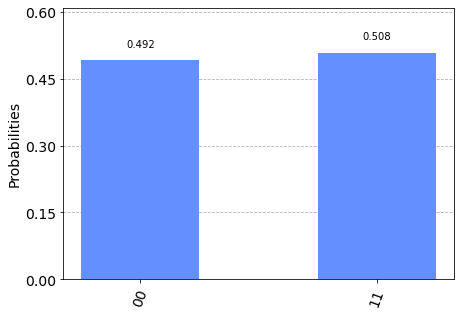

In [154]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(resultat.get_counts(circ))

<div>
The tensorproduct applies when considering a multi-qubit state, considering two qubits $A$ and $B$: 

\begin{equation} 
|\phi_A⟩ = \alpha|0⟩ +\beta|1⟩   \hspace{0.5cm} |\phi_B⟩ = \gamma|0⟩ +\delta|1⟩
\end{equation}

then the state of the two qubit system is:

\begin{equation} 
|\Phi_{AB}⟩ = |\phi_A⟩ \otimes|\phi_B⟩ = (\alpha|0⟩ +\beta|1⟩ \times \gamma|0⟩ +\delta|1⟩ )
\end{equation}
\begin{equation} 
|\Phi_{AB}⟩ = (\alpha\delta|0⟩|0⟩ + \beta\gamma|0⟩|1⟩ + \beta\gamma|1⟩|0⟩  +\beta\delta|1⟩|1⟩ )
\end{equation}
Which can be simplified into: 
\begin{equation} 
|\Phi⟩ = (\alpha\delta|00⟩ + \beta\gamma|01⟩ + \beta\gamma|10⟩  +\beta\delta|11⟩ )
\end{equation}

**Explanation : the H+CNOT (Bell state)**
    
We start with the following state :  

\begin{equation} 
|\Psi_0⟩ = |00⟩ \hspace{0.5cm} ( \hspace{0.5cm} |\Psi_0⟩ = 1|00⟩ + 0|10⟩ + 0|01⟩ + 0|11⟩ \hspace{0.5cm} )
\end{equation} 

$H$ applied to qubit 0: 

\begin{equation} 
|\Psi_1⟩ = \frac{1}{\sqrt{2}}\left(|00⟩ + |10⟩ \right) 
\end{equation}

Here, measuring one qubit state tells nothing about the other one (we only know qubit 1 is in state |0⟩, and qubit 0 is in equal superposition of states |0⟩ and |1⟩. 
    
Now we have added the CNOT gate and the state goes to :  

\begin{equation} 
|\Psi_2⟩ = \frac{1}{\sqrt{2}}\left(|00⟩ + |11⟩ \right) 
\end{equation}

This is an entanglement condition. If we measure one qubit, the state of the other is known. 
    
**Explanation - that an entangled state cannot be represented as a tensor product of the constituent states** 

Assume we can find two qubit states that can be "multiplied" to find the Bell state as a result: 

\begin{equation} 
|\phi⟩ = a|0⟩ + (b+ic)|1⟩  \hspace{0.5cm} and \hspace{0.5cm} |\psi⟩ = d|0⟩ + (e+if)|1⟩  
\end{equation}

Then:
\begin{equation} 
|\phi⟩|\psi⟩ = (ad|00⟩ + (ae + iaf)|01⟩ + (db+idc)|10⟩ + (b+ic)(e+if)|11⟩)  
\end{equation}

By identifying this expression with $|\Psi_2>$ on vector basis  (|00⟩, |01⟩, |10⟩, |11⟩) we get: 

\begin{equation}
ad = \frac{1}{\sqrt{2}} \hspace{0.5cm} ; \hspace{0.5cm} ae + iaf = 0 \hspace{0.5cm} ; \hspace{0.5cm} db + idc = 0 \hspace{0.5cm} ; \hspace{0.5cm} be - cf + i(bf+ce) = \frac{1}{\sqrt{2}}
\end{equation}


Because $ad$ isn't null, then neither $a$ nor $d$ is null. Then a complex number equals zero if and only if both real and imaginary values are both zero. Because $a$ and $d$ are not null, it comes : $e = f = b = c = 0$ , that means : $be - cf = 0$ , which does not match with $be - cf = \frac{1}{\sqrt{2}}$


#### There is no two separate qubit states that corresponds to the state of our two qubit Bell state...
#### ... we cannot know anything about one of the two qubit separately, all we can talk about is the two qubit system.
</div>
                                                                    